In [2]:
import pandas as pd
import numpy as np

In [3]:
CoffeeIndex = pd.read_csv('./result/전국 커피 지수.csv',sep=',',encoding='utf8', index_col='ID')

# 카토그램

In [24]:
korea = pd.read_excel('./source/전국 카토그램.xlsx',encoding='utf8')
korea.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [25]:
korea_stacked = pd.DataFrame(korea.stack())
korea_stacked.reset_index(inplace=True)
korea_stacked.rename(columns={
    'level_0':'y',
    'level_1':'x',
    0:'ID'
},inplace=True)
draw_korea = korea_stacked.copy()
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 커피지수

In [27]:
CoffeeIndex[CoffeeIndex.index.str.find('제주') >= 0]

,스타벅스,커피빈,이디야,빽다방,커피지수
ID,,,,,
제주,13.0,0.0,6.0,4.0,1.3


## 고유 ID 만들 때 시군구명에 '경기도 수원시', '경기도 안산시' 가 아니라 '수원시','안산시'로 나왔던 행들 제거

In [28]:
tmp_set = set(CoffeeIndex.index) - set(draw_korea['ID'])
tmp_set

set()

In [29]:
for tmp in tmp_set:
    CoffeeIndex = CoffeeIndex.drop(CoffeeIndex[CoffeeIndex.index==tmp].index)

In [30]:
CoffeeIndex

,스타벅스,커피빈,이디야,빽다방,커피지수
ID,,,,,
강릉,5.0,0.0,15.0,2.0,0.2941
거제,5.0,0.0,7.0,0.0,0.7143
경산,8.0,0.0,9.0,3.0,0.6667
경주,8.0,4.0,25.0,2.0,0.4444
계룡,1.0,0.0,1.0,0.0,1.0000
...,...,...,...,...,...
합천,0.0,0.0,1.0,0.0,0.0000
홍성,0.0,0.0,4.0,2.0,0.0000
화천,0.0,0.0,1.0,0.0,0.0000


## 행이 삭제되었으니 좌표, ID DF draw_korea을 인구 DF pop과 합친다.
- how='left'로 하면 Coffeeindex에 맞추게 되어 없는 구들은 제외되어 나오지 않는다.
- 고유 ID 만들 때 나왔던 도시들이 이디야 커피가 있음에도 불구하고 누락되어 있음
- 검토해 본 결과 저 4개 대기업 카페는 하나도 나오지 않고 개인카페들만 있는 지역들이었음

In [68]:
cf = pd.merge(CoffeeIndex, draw_korea, how='outer',  on = 'ID')
cf = cf.fillna(0)
cf.tail(15)

,ID,스타벅스,커피빈,이디야,빽다방,커피지수,y,x
235,횡성,0.0,0.0,1.0,0.0,0.0,2,9
236,예천,0.0,0.0,0.0,1.0,0.0,10,8
237,영월,0.0,0.0,0.0,0.0,0.0,7,10
238,울릉,0.0,0.0,0.0,0.0,0.0,8,13
239,군위,0.0,0.0,0.0,0.0,0.0,11,10
240,의성,0.0,0.0,0.0,0.0,0.0,11,11
241,장수,0.0,0.0,0.0,0.0,0.0,17,5
242,진안,0.0,0.0,0.0,0.0,0.0,18,4
243,의령,0.0,0.0,0.0,0.0,0.0,18,7
244,함평,0.0,0.0,0.0,0.0,0.0,20,1


## 모듈

In [51]:
from Cartogram import drawKorea

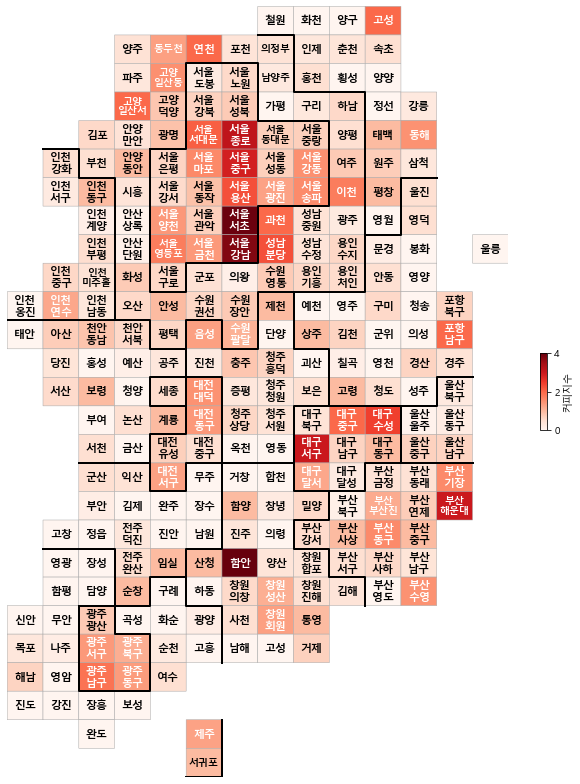

In [56]:
drawKorea('커피지수',cf,'Reds')

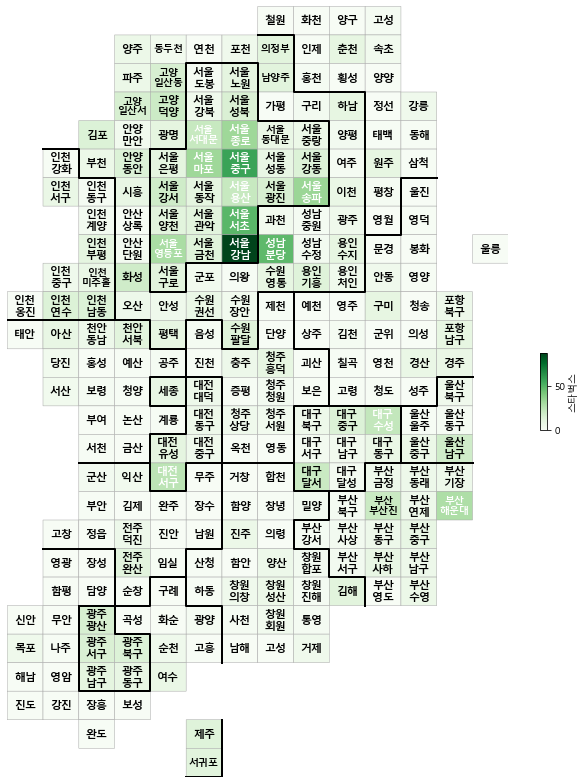

In [36]:
drawKorea('스타벅스',cf,'Greens')

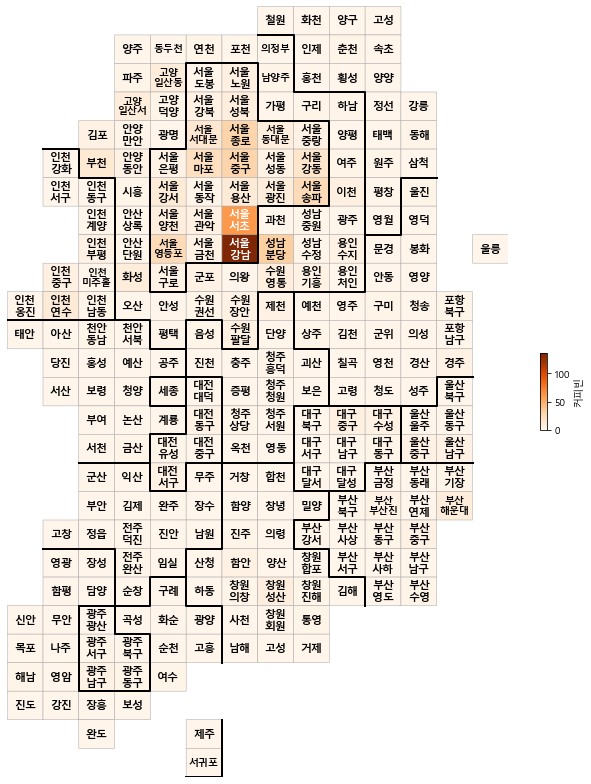

In [37]:
drawKorea('커피빈',cf,'Oranges')


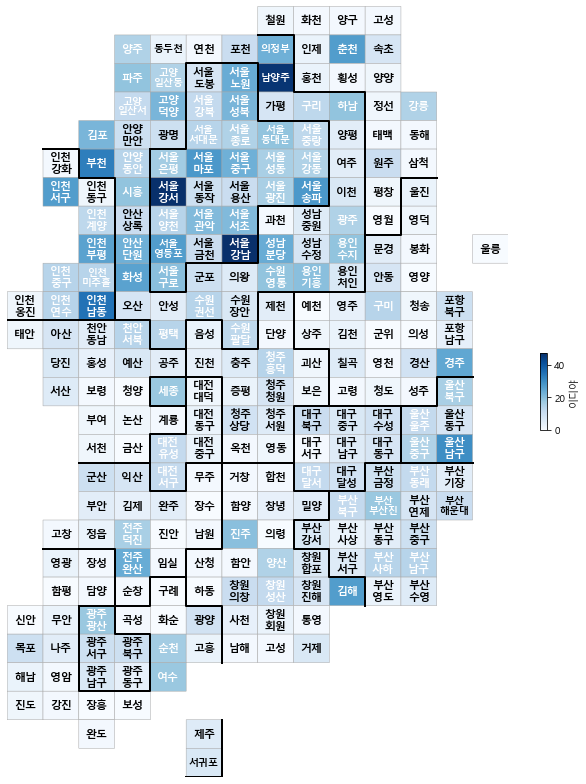

In [39]:
drawKorea('이디야',cf,'Blues')

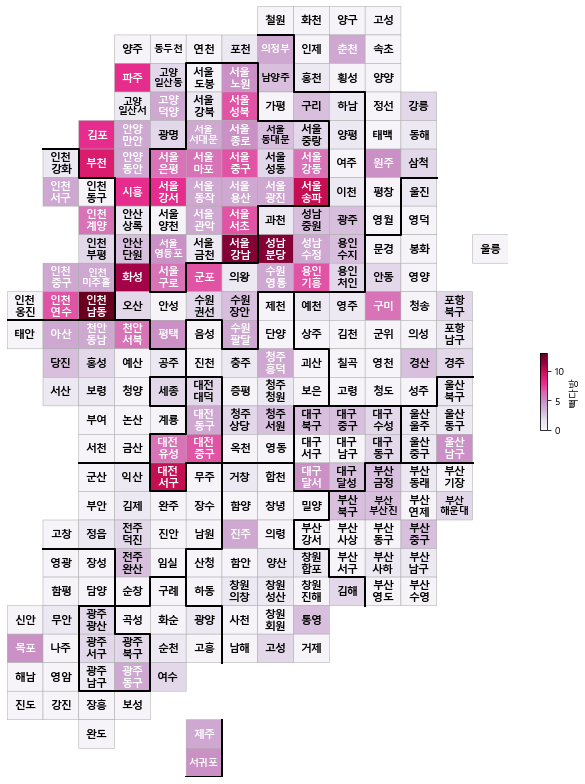

In [41]:
drawKorea('빽다방',cf,'PuRd')


# Folium

In [57]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
geo_path = './source/전국 경계선 JSon.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

In [62]:
cf['ID']

0      강릉
1      거제
2      경산
3      경주
4      계룡
       ..
245    구례
246    신안
247    화순
248    장흥
249    보성
Name: ID, Length: 250, dtype: object

In [70]:
cf.set_index('ID',inplace=True)

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = cf['커피지수'],
               # 이건 왜 굳이 index로 바꿔줘야 제대로 나오는지 아직도 의문
               columns= [cf.index, cf['커피지수']],
               fill_color= 'YlGnBu',
               key_on='id'
)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>커피지수와 카페</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))


map